In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
df=pd.read_csv('/content/slr (1).csv')

In [3]:
df.head()

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


**DataFrame Observation**

In [ ]:
#continous_column=["Exam","GPA"]
#dependent=GPA
#independent=Exam

#Supervised regression

**Data cleaning using pandas**

Handling Null Values

Handling Duplicates

Data Type Conversion

Standardizing or Normalizing Data

Handling Text Data

Handling Date and Time Data

Handling Outliers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exam    84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
df.isnull().sum()

Exam    0
GPA     0
dtype: int64

In [7]:
df.corr()

,Exam,GPA
Exam,1.000000,0.637184
GPA,0.637184,1.000000


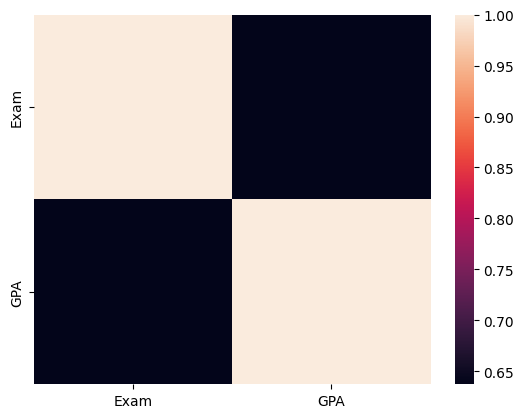

In [8]:
sns.heatmap(df.corr())
plt.show()

**Hypothesis testing**

In [10]:
continous_column=["Exam","GPA"]

In [12]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)

In [13]:
res=[]
for i in continous_column:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,Exam,1845.273810,1854.16400,H0-There is no significant difference,0.514925,0.657867
1,GPA,3.330238,3.32262,H0-There is no significant difference,0.076272,0.946146


In [14]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [15]:
columns=continous_column
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,Exam&GPA,Ha-There is significant difference,67.810505,3.802739e-36,Ha-There is significant difference,342.47613,8.746056e-36


In [16]:
# consider independent as x  and dependent as y
x1=df["Exam"]
y=df["GPA"]

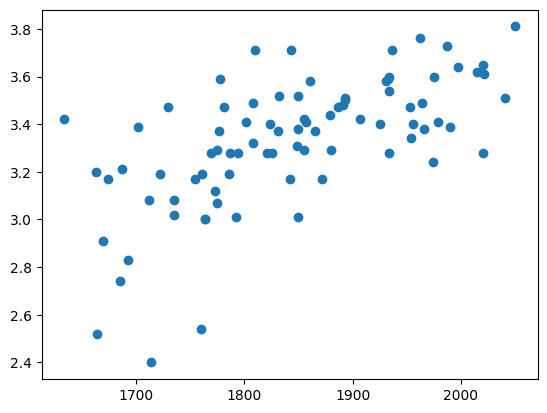

In [17]:
plt.scatter(x1,y)
plt.show()

In [19]:
x=sm.add_constant(x1)
model=sm.OLS(y,x)# creating a model using dependent and dependent variable through ols method
result=model.fit() #Training the model

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           7.20e-11
Time:                        15:40:52   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
Exam           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
yhat=result.params[0]+result.params[1]*x1
yhat

0     3.112890
1     3.030105
2     3.189051
3     3.064875
4     3.078120
        ...   
79    3.480452
80    3.271836
81    3.564892
82    3.523500
83    3.669201
Name: Exam, Length: 84, dtype: float64

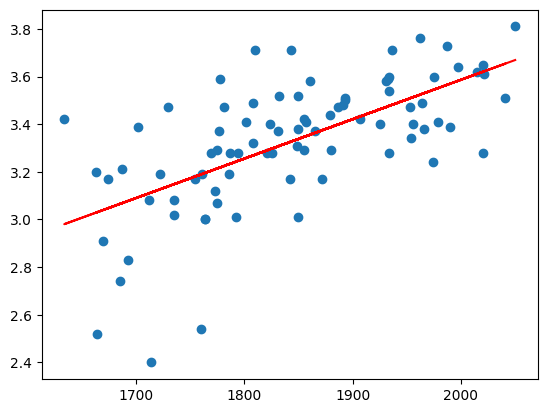

In [23]:
plt.scatter(x1,y)
plt.plot(x1,yhat,color='red')
plt.show()